In [1]:
# Redo exercise 1 with the ApproxFun.jl package. This should go into function q2(n).
using Plots
using ApproxFun
using LaTeXStrings
using Base.Test

Fun(Chebyshev(【-1.0,1.0】),[0.0,1.0])

In [23]:
f = t -> t + 2.*t.^2 - e.^(-t)
n = 15
S = Chebyshev(-3..3)
p =  points(S,n) # yields the same points as gausschebyshev(15)[1] using FastGaussQuadrature
a = Fun(S, ApproxFun.transform(S, f))

LoadError: Override for Chebyshev(【-3.0,3.0】)

In [24]:
x_new = linspace(-3, 3, 100)

F_approx = a.(x_new)

100-element Array{Float64,1}:
 -5.08554
 -4.56371
 -4.09664
 -3.68026
 -3.31071
 -2.98439
 -2.69788
 -2.44797
 -2.23166
 -2.0461 
 -1.88862
 -1.7567 
 -1.64798
  ⋮      
 13.1253 
 13.7646 
 14.4182 
 15.0863 
 15.7687 
 16.4656 
 17.1769 
 17.9026 
 18.6428 
 19.3974 
 20.1666 
 20.9502 

In [26]:
F = f.(x_new)
err = abs(F-F_approx)

100-element Array{Float64,1}:
 4.52971e-14
 3.28626e-14
 2.66454e-14
 4.08562e-14
 5.32907e-15
 3.01981e-14
 4.44089e-14
 2.93099e-14
 0.0        
 2.84217e-14
 4.44089e-14
 4.08562e-14
 2.39808e-14
 ⋮          
 3.55271e-14
 3.55271e-14
 1.95399e-14
 1.77636e-15
 2.84217e-14
 3.90799e-14
 2.13163e-14
 7.10543e-15
 3.55271e-14
 2.13163e-14
 2.84217e-14
 3.90799e-14

In [40]:
@test maxabs(err) < 1e-12

Test Passed
  Expression: maxabs(err) < 1.0e-12
   Evaluated: 4.529709940470639e-14 < 1.0e-12


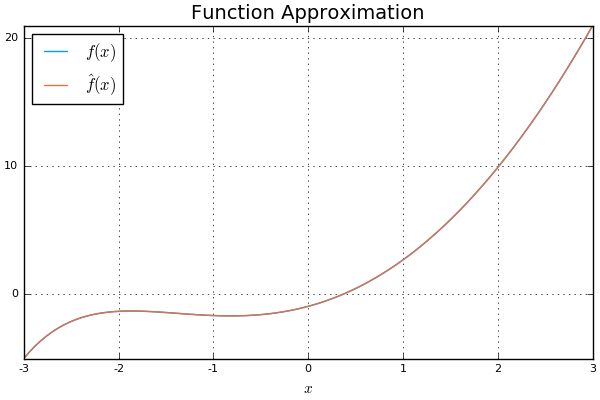

In [30]:
plot1 = Plots.plot(x_new, [F, F_approx], line = 1, label = [L"f(x)" L"\hat{f}(x)"],
                xlab = L"x", title = "Function Approximation", legendfont = font(12))


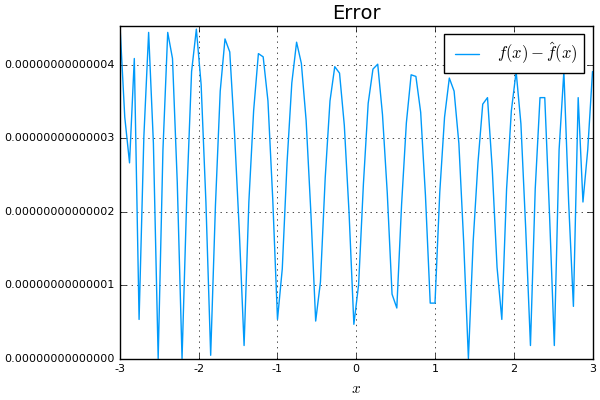

In [34]:
plot1 = Plots.plot(x_new, err, line = 1, label = L"$f(x) - \hat{f}(x)$",
                xlab = L"x", title = "Error", legendfont = font(12))

In [43]:
deg = n-1

S = [-3,3] # domain of integration

z = gausschebyshev(n)[1]

x = (S[2] + S[1])/2 + (S[2] - S[1])/2.*z
# Remark that the interval is still centered, so the first term is useless in this case

F_interp_nodes = f(x)

Phi = Array{Float64}(n, deg +1)
for d in 1:(deg+1)
    Phi[:, d] = cos(acos.(z)*(d-1))
end

c = Phi\F_interp_nodes

z_new = 2.*(x_new .+ 3)/6 - 1 

Phi_new = Array{Float64}(100, deg+1)

for d in 0:deg
    Phi_new[:,d+1] = cos(acos.(z_new).*d)
end

F_interp_new = Phi_new * c

100-element Array{Float64,1}:
 -5.08554
 -4.56371
 -4.09664
 -3.68026
 -3.31071
 -2.98439
 -2.69788
 -2.44797
 -2.23166
 -2.0461 
 -1.88862
 -1.7567 
 -1.64798
  ⋮      
 13.1253 
 13.7646 
 14.4182 
 15.0863 
 15.7687 
 16.4656 
 17.1769 
 17.9026 
 18.6428 
 19.3974 
 20.1666 
 20.9502 

In [45]:
err2 = abs(F_interp_new - F)

100-element Array{Float64,1}:
 9.27367e-10
 9.16456e-10
 3.86421e-10
 4.67895e-10
 8.908e-10  
 7.88629e-10
 3.4487e-10 
 1.9659e-10 
 6.38121e-10
 8.66735e-10
 8.53604e-10
 6.34381e-10
 2.83124e-10
 ⋮          
 4.75119e-10
 6.34479e-10
 6.39364e-10
 4.67161e-10
 1.42837e-10
 2.48662e-10
 5.64306e-10
 6.32571e-10
 3.29727e-10
 2.70251e-10
 6.3606e-10 
 6.38718e-10


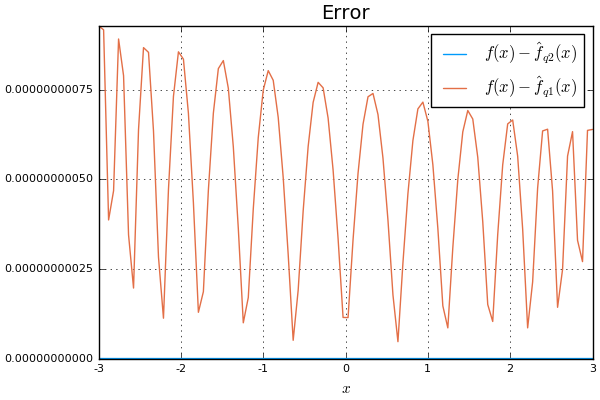

In [46]:
plot1 = Plots.plot(x_new, [err, err2], line = 1, label = [L"$f(x) - \hat{f}_{q2}(x)$" L"$f(x) - \hat{f}_{q1}(x)$"],
                xlab = L"x", title = "Error", legendfont = font(12))